#  Image Representation

In [206]:
from PIL import Image
from pylab import *

## 1. Read in all of the 10 images in python, resize each of them a 100 by 100 pixels format

In [207]:
img_lst = []
for i in range(1,11):
    print('image/'+str(i)+'.png')
    img = Image.open('image/'+str(i)+'.png').resize((100,100))
    img_lst.append(img)

image/1.png
image/2.png
image/3.png
image/4.png
image/5.png
image/6.png
image/7.png
image/8.png
image/9.png
image/10.png


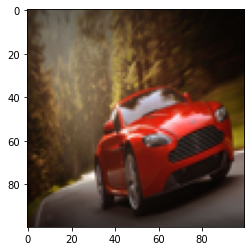

In [208]:
imshow(img_lst[7])

## 2. Convert them to greyscale arrays (no color information needs to be kept, so the arrays will be 2‐ D);

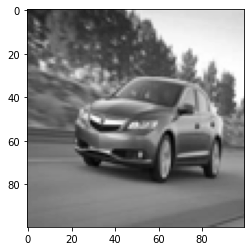

In [209]:
gray_lst = []
for i in img_lst:
    im_gray = i.convert('L')
    gray_lst.append(im_gray)

imshow(gray_lst[0], cmap='gray')

In [210]:
# check if the shape is 2D
for i in range(0,10):
    print(i, array(gray_lst[i]).shape)

0 (100, 100)
1 (100, 100)
2 (100, 100)
3 (100, 100)
4 (100, 100)
5 (100, 100)
6 (100, 100)
7 (100, 100)
8 (100, 100)
9 (100, 100)


## 3. Flatten the 2‐D array to a 1‐D array (vectors), draw a histogram to present the intensity value distribution of all of the images;

0 (10000,)
1 (10000,)
2 (10000,)
3 (10000,)
4 (10000,)
5 (10000,)
6 (10000,)
7 (10000,)
8 (10000,)
9 (10000,)


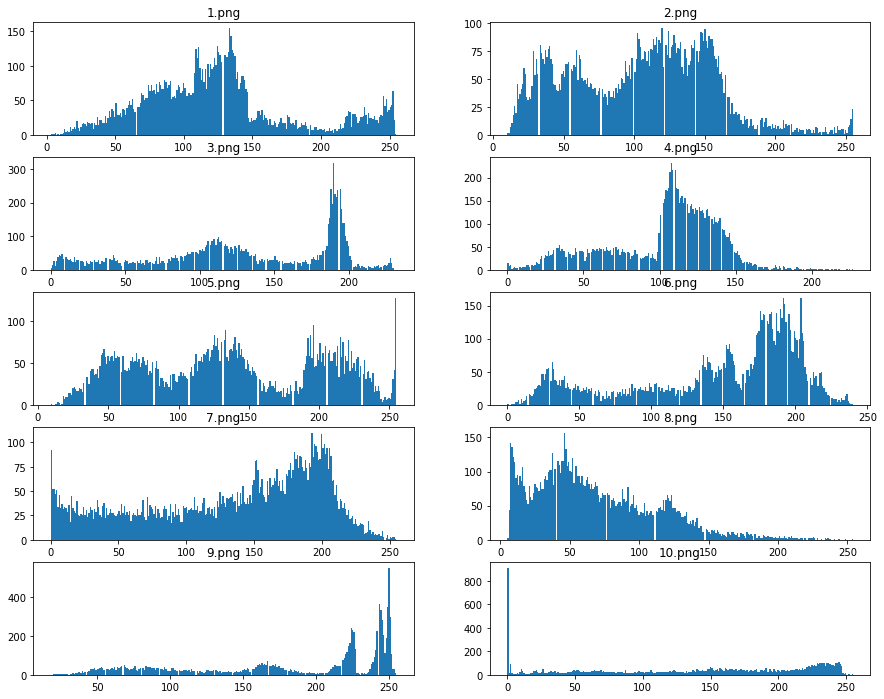

In [211]:
# flatten image, make it 1 dimensional
flatten_lst = []
fig, ax = plt.subplots(figsize=(15,12))
count = 1
for i in range(0, 10):
    im_gray_f = array(gray_lst[i]).flatten()
    flatten_lst.append(im_gray_f)
    print(i, im_gray_f.shape)
    
    plt.subplot(5,2,count)
    ax = hist(im_gray_f, bins=256)
    plt.title(str(i+1)+'.png')
    count += 1

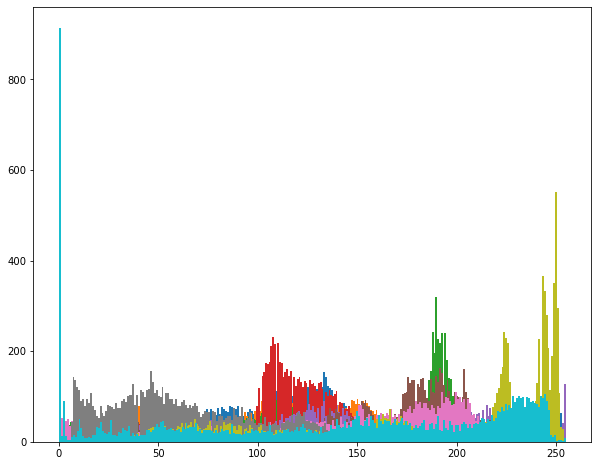

In [212]:
# 10 images on one plot
flatten_lst = []
fig, ax = plt.subplots(figsize=(10,8))
count = 1
for i in range(0, 10):
    im_gray_f = array(gray_lst[i]).flatten()
    flatten_lst.append(im_gray_f)
    hist_0 = hist(im_gray_f, bins=256)

In [133]:
array(lst).shape

(10, 10000)

In [135]:
# to csv
arr = array(lst)
pd.DataFrame(arr).to_csv('IA2_p2_step3.csv')  

## 4. Conduct a histogram equalization to normalize the images, draw a histogram to present the intensity value distribution of all of the images after the normalization

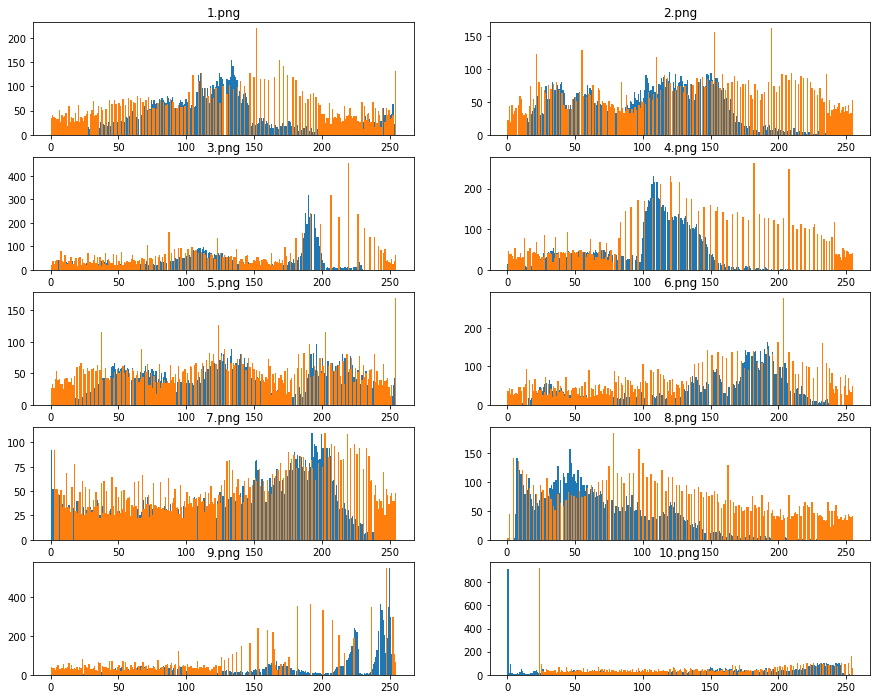

In [214]:
normalized = []
fig, ax = plt.subplots(figsize=(15,12))
count = 1
for i in range(0, 10):
    ## before normalized
    im_gray_f = array(gray_lst[i]).flatten()
    flatten_lst.append(im_gray_f)
    
    plt.subplot(5,2,count)
    ax = hist(im_gray_f, bins=256)
    plt.title(str(i+1)+'.png')
    
    ## after normalized
    imhist, bins = histogram(flatten_lst[i], bins=256, density = True)
    # reassign value according to cdf(cumulative distribution)
    cdf = imhist.cumsum() 
    cdf = 255 * cdf / cdf[-1]
    # store new values, interp=fill in new vals.
    # orginal val, bins, new val. Remove the last bin
    im2 = interp(flatten_lst[i], bins[:-1,], cdf )
    
    
    plt.subplot(5,2,count)
    ax = hist(im2, bins=256)
    plt.title(str(i+1)+'.png')
    count += 1

    # turn back to 2D(gray scale image's shape) 
    im_norm = im2.reshape(array(gray_lst[i]).shape)
    normalized.append(im_norm)

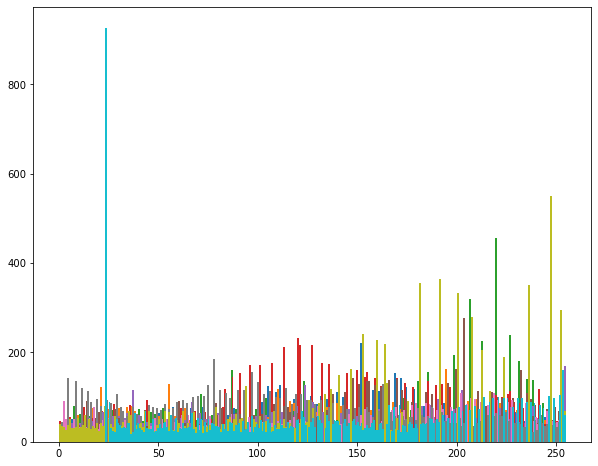

In [193]:
# 10 images on one plot
fig, ax = plt.subplots(figsize=(10,8))
for i in range(0, 10):
    imhist, bins = histogram(flatten_lst[i], bins=256, density = True)
    cdf = imhist.cumsum() 
    cdf = 255 * cdf / cdf[-1]
    im2 = interp(flatten_lst[i], bins[:-1,], cdf )    
    
    hist(im2, bins=256)

# 5. Compare the histogram in step 4 with step 3, discuss what the difference is.

After the step 4, the color codes of images are distributed more evenly. For example, colors of 8.png orignally are concentrated around color code 0 to 100. After normailzation in step 4, colors distributed evenly between 0 to 255.
As you can see from the images below, after the normalization, the contrast was enhanced so the objects in the image is clearer than before.

### Before step 4 

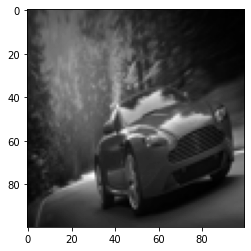

In [204]:
imshow(gray_lst[7], cmap='gray')

### After step 4 

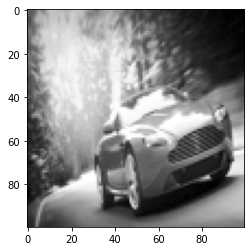

In [205]:
imshow(normalized[7], cmap='gray')